The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API.

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read in the Nobel CSV as a DataFrame

file_path = "C:\\Users\\jonas\\Documents\\MeusProjetos\\BootCamp\Datacamp - Data Scientist Associate\\08 - Project Visualizing the History of Nobel Prize Winners\\datalab_export_2025-04-09 20_30_16.csv"

nobel_df = pd.read_csv(file_path)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jonas\AppData\Local\Temp\ipykernel_5480\1693983360.py:3: SyntaxWarning: invalid escape sequence '\D'
  file_path = "C:\\Users\\jonas\\Documents\\MeusProjetos\\BootCamp\Datacamp - Data Scientist Associate\\08 - Project Visualizing the History of Nobel Prize Winners\\datalab_export_2025-04-09 20_30_16.csv"


In [3]:
#Checking dataframe 
nobel_df.head()

,index,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
# What is the most commonly awarded gender and birth country?

top_gender = nobel_df['sex'].value_counts().idxmax()

top_country = nobel_df['birth_country'].value_counts().idxmax()

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [5]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Extract decade from the year column
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Create a column that creates a flag for winners whose birth country is "United States of America"
nobel_df['is_usa'] = nobel_df['birth_country'] == 'United States of America'

# Group by decade
decade_group = nobel_df.groupby('decade')

# Calculate the ratio of US-born laureates to total laureates for each decade
ratio_usa = decade_group['is_usa'].sum() / decade_group['is_usa'].count()

# Get the decade with the highest ratio
max_decade_usa = ratio_usa.idxmax()

print(max_decade_usa)


2000


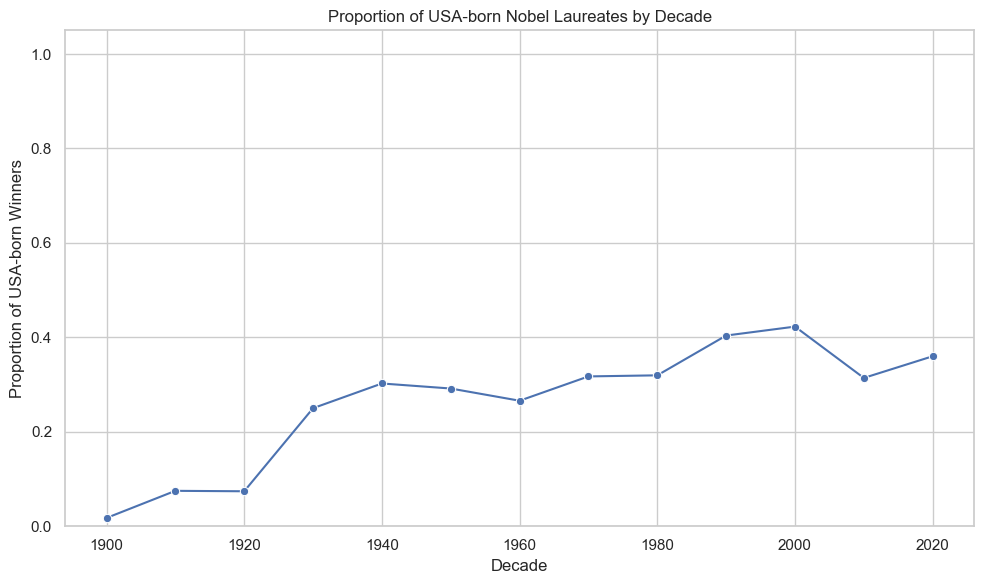

In [6]:
# Plotting USA born winners
ratio_usa = decade_group['is_usa'].sum() / decade_group['is_usa'].count()

# Convert to DataFrame
usa_df = ratio_usa.reset_index(name='usa_born_winner')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=usa_df, x='decade', y='usa_born_winner', marker='o')
plt.title("Proportion of USA-born Nobel Laureates by Decade")
plt.ylabel("Proportion of USA-born Winners")
plt.xlabel("Decade")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

# Step 1: Calculate total laureates per decade and category
total_by_decade_category = nobel_df.groupby(['decade', 'category']).size().reset_index(name='total_winners')

# Step 2: Filter only female laureates
female_df = nobel_df[nobel_df['sex'] == 'Female']

# Step 3: Count female laureates per decade and category
female_by_decade_category = female_df.groupby(['decade', 'category']).size().reset_index(name='female_winners')

# Step 4: Merge total and female counts
merged_df = pd.merge(total_by_decade_category, female_by_decade_category,
                     on=['decade', 'category'], how='left')

# Step 5: Replace NaN with 0 (no female winners)
merged_df['female_winners'] = merged_df['female_winners'].fillna(0)

# Step 6: Calculate proportion of female laureates
merged_df['female_proportion'] = merged_df['female_winners'] / merged_df['total_winners']

# Step 7: Find the decade and category with the highest female proportion
max_row = merged_df.loc[merged_df['female_proportion'].idxmax()]
max_female_dict = {int(max_row['decade']): max_row['category']}
print("Max female proportion:", max_female_dict)


Max female proportion: {2020: 'Literature'}


In [8]:
# Who was the first woman to receive a Nobel Prize, and in what category?

first_woman = female_df.sort_values('year').iloc[0]

# Extract name and category
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']


In [9]:
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [10]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?
laureate_counts = nobel_df['full_name'].value_counts()

# Filter for names that appear 2 or more times
repeat_winners = laureate_counts[laureate_counts >= 2]

# Convert the index (names) to a list
repeat_list = repeat_winners.index.tolist()

print("Repeat Nobel Prize winners:", repeat_list)

Repeat Nobel Prize winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']


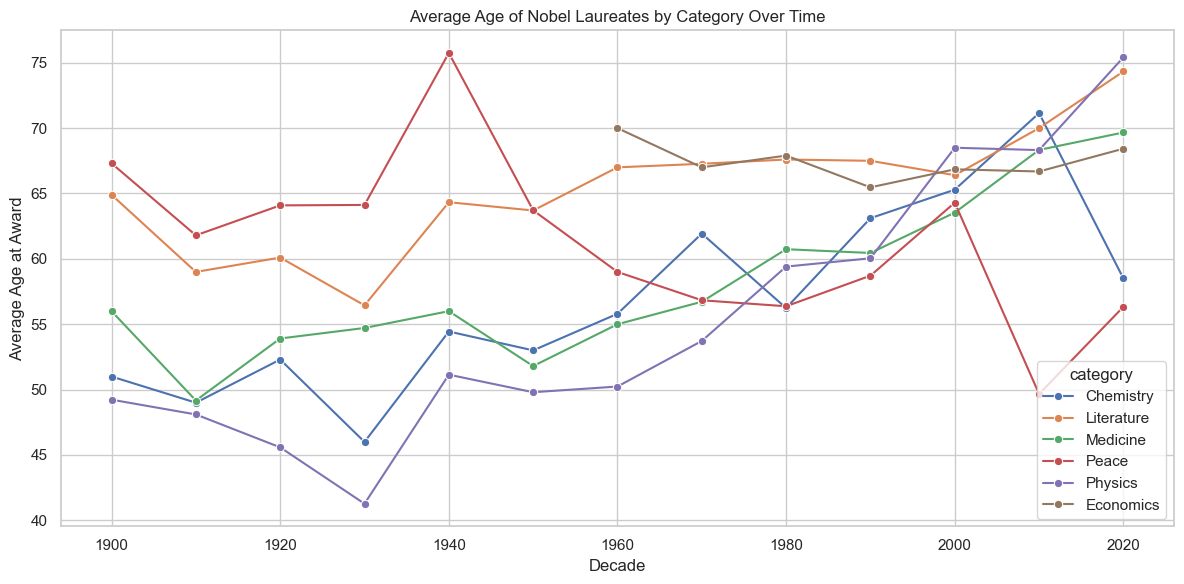

In [11]:
# How has the age of Nobel laureates changed over time?

# Calculate age at time of award
nobel_df['birth_date'] = pd.to_datetime(nobel_df['birth_date'], errors='coerce')
nobel_df['age_at_award'] = nobel_df['year'] - nobel_df['birth_date'].dt.year

# Filter valid rows
valid_age_df = nobel_df[nobel_df['age_at_award'].notnull()]

# Average age per decade and category
avg_age = valid_age_df.groupby(['decade', 'category'])['age_at_award'].mean().reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_age, x='decade', y='age_at_award', hue='category', marker='o')
plt.title('Average Age of Nobel Laureates by Category Over Time')
plt.ylabel('Average Age at Award')
plt.xlabel('Decade')
plt.grid(True)
plt.tight_layout()
plt.show()